<a href="https://www.kaggle.com/code/ehetshamshaukat/lung-cancer-analysis-and-model?scriptVersionId=104505702" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data analysis

## importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import graph_objs as go
from plotly import express as px
from plotly import offline

## Importing and Reading Data

In [2]:
dataset=pd.read_csv("../input/lung-cancer/survey lung cancer.csv")

In [3]:
dataset.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES
243,M,61,1,1,2,1,2,2,1,2,2,2,2,2,1,YES
89,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
113,M,60,2,2,2,1,1,1,1,1,2,1,1,2,2,YES
261,M,39,2,1,1,2,1,2,2,2,2,1,2,1,2,YES


## Basic Analysis

In [4]:
dataset.shape

(309, 16)

In [5]:
dataset.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
dataset.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [7]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## Reuseable Code

In [8]:
def create_pie(name,title,text):
    labels=name.index
    values=name.values
    trace0=go.Pie(labels=labels,values=values,hole=0.4,textinfo="label+percent+value",textposition="inside")
    data=[trace0]
    layout=dict(title=title,title_x=0.5,annotations=[dict(text=text,x=0.5,y=0.5,showarrow=False,font_size=15)])
    fig=dict(data=data,layout=layout)
    offline.iplot(fig)

In [9]:
def create_sunburst(df,path:list,values,title):
    fig=px.sunburst(df,path=path,values=values)
    fig.update_layout(title=title,title_x=0.5)
    fig.show()

## Preprocessing

In [10]:
dataset.columns=dataset.columns.str.title()

In [11]:
dataset.sample(5)

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
44,F,70,2,2,1,2,2,1,1,1,2,2,1,2,1,YES
247,M,67,1,2,1,1,1,2,1,2,2,2,2,1,1,YES
234,M,77,1,2,1,2,1,2,2,2,2,2,1,1,1,YES
91,F,71,1,1,1,1,2,2,2,1,1,2,2,1,2,YES


In [12]:
dataset.columns

Index(['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety',
       'Peer_Pressure', 'Chronic Disease', 'Fatigue ', 'Allergy ', 'Wheezing',
       'Alcohol Consuming', 'Coughing', 'Shortness Of Breath',
       'Swallowing Difficulty', 'Chest Pain', 'Lung_Cancer'],
      dtype='object')

In [13]:
dataset["Gender"]=dataset["Gender"].replace(["M","F"],["Male","Female"])
col=["Smoking","Yellow_Fingers","Anxiety","Peer_Pressure","Chronic Disease","Fatigue ","Allergy ","Wheezing","Alcohol Consuming","Coughing","Shortness Of Breath","Swallowing Difficulty","Chest Pain"]
for x in col:
        dataset[x]=dataset[x].replace([1,2],["No","Yes"])

In [14]:
dataset.sample(5)

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
281,Male,55,Yes,No,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,NO
187,Male,55,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,YES
231,Male,64,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,YES
72,Male,67,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,YES
130,Female,51,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,YES


Feature Engineering

In [15]:
dataset.loc[(dataset['Age'] >= 0) & (dataset["Age"] <= 9),"In_age"]="In 0's"
dataset.loc[(dataset['Age'] >= 10) & (dataset["Age"] <= 19),"In_age"]="In 10's"
dataset.loc[(dataset['Age'] >= 20) & (dataset["Age"] <= 29),"In_age"]="In 20's"
dataset.loc[(dataset['Age'] >= 30) & (dataset["Age"] <= 39),"In_age"]="In 30's"
dataset.loc[(dataset['Age'] >= 40) & (dataset["Age"] <= 49),"In_age"]="In 40's"
dataset.loc[(dataset['Age'] >= 50) & (dataset["Age"] <= 59),"In_age"]="In 50's"
dataset.loc[(dataset['Age'] >= 60) & (dataset["Age"] <= 69),"In_age"]="In 60's"
dataset.loc[(dataset['Age'] >= 70) & (dataset["Age"] <= 79),"In_age"]="In 70's"
dataset.loc[(dataset['Age'] >= 80) & (dataset["Age"] <= 89),"In_age"]="In 80's"

## Analysis

## Gender Vs. Lung Cancer

In [16]:
dataset["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
gender_type_count=dataset["Gender"].value_counts(sort=True)
gender_type_count

Male      162
Female    147
Name: Gender, dtype: int64

In [18]:
create_pie(gender_type_count,"Gender Distribution","Gender")

In [19]:
gender_vs_cancer=dataset.groupby(["Gender","Lung_Cancer"]).agg(total_cancer=("Lung_Cancer","count"),minimum_age=("Age","min"),maximum_age=("Age","max")).reset_index()
gender_vs_cancer

,Gender,Lung_Cancer,total_cancer,minimum_age,maximum_age
0,Female,NO,22,21,87
1,Female,YES,125,38,81
2,Male,NO,17,46,69
3,Male,YES,145,39,79


In [20]:
create_sunburst(gender_vs_cancer,["Gender","Lung_Cancer"],"total_cancer","Gener Vs. Cancer")

 ## Age

In [21]:
dataset["Age"].min()

21

In [22]:
dataset["Age"].max()

87

## Alcohol consumption

In [23]:
dataset["Alcohol Consuming"].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
alcohol_con=dataset["Alcohol Consuming"].value_counts(sort=True)
alcohol_con

Yes    172
No     137
Name: Alcohol Consuming, dtype: int64

In [25]:
create_pie(alcohol_con,"Achohol Comsuption","Ratio")

In [26]:
in_age_vs_cancer=dataset.groupby(["In_age","Lung_Cancer"]).agg(total=("Lung_Cancer","count")).reset_index()
in_age_vs_cancer

,In_age,Lung_Cancer,total
0,In 20's,NO,1
1,In 30's,YES,2
2,In 40's,NO,2
3,In 40's,YES,10
4,In 50's,NO,13
5,In 50's,YES,78
6,In 60's,NO,20
7,In 60's,YES,114
8,In 70's,NO,2
9,In 70's,YES,64


In [27]:
create_sunburst(in_age_vs_cancer,["In_age","Lung_Cancer"],"total","Age and Cancer.")

## Smoker

In [28]:
smoker_vs_gender=dataset.groupby(["Gender","Smoking"]).agg(count=("Smoking","count")).reset_index()
smoker_vs_gender

,Gender,Smoking,count
0,Female,No,67
1,Female,Yes,80
2,Male,No,68
3,Male,Yes,94


In [29]:
create_sunburst(smoker_vs_gender,["Gender","Smoking","count"],"count","Gender Vs. Count")

In [30]:
smoker_age_cancer=dataset.groupby(["Smoking","In_age","Lung_Cancer"]).agg(num_of_smoker=("Smoking","count")).reset_index()
smoker_age_cancer

,Smoking,In_age,Lung_Cancer,num_of_smoker
0,No,In 30's,YES,1
1,No,In 40's,NO,1
2,No,In 40's,YES,5
3,No,In 50's,NO,7
4,No,In 50's,YES,28
5,No,In 60's,NO,11
6,No,In 60's,YES,49
7,No,In 70's,YES,30
8,No,In 80's,NO,1
9,No,In 80's,YES,2


In [31]:
create_sunburst(smoker_age_cancer,["Smoking","In_age","Lung_Cancer"],"num_of_smoker","Smoker Vs. Cancer")

# Machine learning

## Importing libraries

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay

## Importing Data

In [33]:
dataset_ml=pd.read_csv("../input/lung-cancer/survey lung cancer.csv")

In [34]:
dataset_ml.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
159,M,68,1,1,2,2,2,1,1,1,2,1,1,1,1,NO
301,M,64,1,2,2,2,1,1,2,1,2,1,1,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
298,M,62,2,1,2,1,1,2,1,2,2,2,2,1,2,YES
94,M,48,2,1,1,1,2,2,2,1,2,2,2,2,2,YES


## Preprocessing

In [35]:
dataset_ml.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [36]:
dataset_ml.columns=dataset_ml.columns.str.title()

In [37]:
dataset_ml.columns

Index(['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety',
       'Peer_Pressure', 'Chronic Disease', 'Fatigue ', 'Allergy ', 'Wheezing',
       'Alcohol Consuming', 'Coughing', 'Shortness Of Breath',
       'Swallowing Difficulty', 'Chest Pain', 'Lung_Cancer'],
      dtype='object')

In [38]:
col=["Smoking","Yellow_Fingers","Anxiety","Peer_Pressure","Chronic Disease","Fatigue ","Allergy ","Wheezing","Alcohol Consuming","Coughing","Shortness Of Breath","Swallowing Difficulty","Chest Pain"]
for x in col:
        dataset_ml[x]=dataset_ml[x].replace([1,2],[0,1])

In [39]:
dataset_ml["Gender"]=dataset_ml["Gender"].replace(["M","F"],[1,0])
dataset_ml["Lung_Cancer"]=dataset_ml["Lung_Cancer"].replace(["YES","NO"],[1,0])

In [40]:
dataset_ml

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


## Data spliting

In [41]:
X=dataset_ml.drop(["Lung_Cancer"],axis=1)
y=dataset_ml["Lung_Cancer"]

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [43]:
ytest

107    1
8      0
34     0
99     1
161    1
      ..
68     1
269    1
218    1
133    1
13     1
Name: Lung_Cancer, Length: 62, dtype: int64

## Model training

In [44]:
lr=LogisticRegression(penalty="l2",C=1.0,solver="liblinear")
lr.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

In [45]:
predicted_value=lr.predict(xtest)
predicted_value

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## comparing

In [46]:
comparation=pd.DataFrame({"Actual Value":ytest,"Predicted Value":predicted_value})
comparation.sample(10)

,Actual Value,Predicted Value
189,1,1
163,1,1
21,1,1
259,1,1
56,1,1
232,1,1
107,1,1
223,1,1
177,1,1
23,1,1


## Model evalution

In [47]:
av=comparation["Actual Value"]
pv=comparation["Predicted Value"]
acc=accuracy_score(av,pv)
pre=precision_score(av,pv)
rec=recall_score(av,pv)
print("Accuracy score: ",acc)
print("Precision score: ",pre)
print("Recall score: ",rec)

Accuracy score:  0.9354838709677419
Precision score:  0.9464285714285714
Recall score:  0.9814814814814815


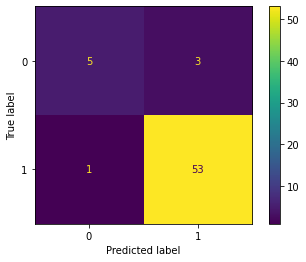

In [48]:
cmd=ConfusionMatrixDisplay.from_predictions(comparation["Actual Value"],comparation["Predicted Value"])
cmd